# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('/content/drive/MyDrive/client_data.csv')
price_df = pd.read_csv('/content/drive/MyDrive/price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [5]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [6]:
len(client_df.id.unique())

14606

In [7]:
len(price_df.id.unique())

16096

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [9]:
client_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [10]:
client_df.cons_12m.value_counts()

0          117
2882597     27
3329244     24
1743025     18
3926060     18
          ... 
22927        1
2630         1
6346         1
7985         1
7223         1
Name: cons_12m, Length: 11065, dtype: int64

There are 117 clients(records of values) where the cons_12m(electricity consumption of the past 12 months) is zero. Is this possible? Are these supposed to be missing values?

In [11]:
client_df[client_df['cons_12m']==0]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
135,6179f9b2f03fe9aaceb4f82e67d0842a,MISSING,0,0,0,2011-05-05,2016-05-05,2011-05-05,2015-05-06,0.00,...,f,0.00,31.26,31.26,1,0.00,5,ldkssxwpmemidmecebumciepifcamkci,17.250,0
268,bac4c08b69328cf2fec32431977ffb99,MISSING,0,0,0,2009-08-20,2016-12-31,2009-08-20,2016-01-01,0.00,...,f,0.00,0.00,0.00,1,0.00,6,ldkssxwpmemidmecebumciepifcamkci,16.000,0
344,0ea1b04911beee36e66c68e004991459,MISSING,0,0,0,2010-01-25,2017-01-25,2010-01-25,2016-01-26,0.00,...,f,0.00,182.28,182.28,1,0.00,6,ldkssxwpmemidmecebumciepifcamkci,73.000,0
392,d15ef55fdbf63ef2bddfd1bd67959ab4,MISSING,0,0,0,2009-06-19,2016-06-19,2009-06-19,2015-06-23,0.00,...,f,0.00,27.14,27.14,1,1598.33,7,ldkssxwpmemidmecebumciepifcamkci,13.200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13892,66a533210123d42b3a94cb7dcb1e3808,MISSING,0,0,0,2009-11-12,2016-11-12,2015-09-20,2015-11-13,299.78,...,f,37.95,28.11,28.11,1,7.14,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,1
13899,8a4227d31b79682ad0951775add41067,foosdfpfkusacimwkcsosbicdxkicaua,0,0,0,2011-11-10,2016-11-10,2015-11-01,2015-11-11,0.00,...,f,0.00,121.86,121.86,1,0.00,4,lxidpiddsbxsbosboudacockeimpuepw,63.000,0
13999,dbfba3ca6e9603bf3b2d923c09c2f380,foosdfpfkusacimwkcsosbicdxkicaua,0,0,0,2010-10-07,2016-10-07,2015-08-27,2015-10-09,0.00,...,t,0.00,7.80,7.80,2,0.00,5,lxidpiddsbxsbosboudacockeimpuepw,10.390,0
14144,56471187209cd2cbdf41564c135452b2,MISSING,0,0,0,2008-07-01,2016-12-31,2008-07-01,2016-01-01,0.00,...,f,0.00,0.12,0.12,1,0.00,8,ldkssxwpmemidmecebumciepifcamkci,40.000,0


In [12]:
client_df.cons_last_month.value_counts()

0         4983
382647      27
509826      24
558120      18
469210      18
          ... 
202          1
30084        1
7190         1
17336        1
11367        1
Name: cons_last_month, Length: 4751, dtype: int64

In [13]:
client_df.date_end.value_counts()

2016-02-01    145
2016-08-01    125
2016-09-01    117
2016-10-05    115
2016-12-31    104
             ... 
2017-01-29      1
2017-06-01      1
2017-01-28      1
2017-06-13      1
2017-06-11      1
Name: date_end, Length: 368, dtype: int64

Checking for missing values

In [14]:
client_df.isna().sum().sort_values()

id                                0
origin_up                         0
num_years_antig                   0
net_margin                        0
nb_prod_act                       0
margin_net_pow_ele                0
margin_gross_pow_ele              0
imp_cons                          0
has_gas                           0
forecast_price_pow_off_peak       0
forecast_price_energy_peak        0
forecast_price_energy_off_peak    0
forecast_meter_rent_12m           0
forecast_discount_energy          0
forecast_cons_year                0
forecast_cons_12m                 0
date_renewal                      0
date_modif_prod                   0
date_end                          0
date_activ                        0
cons_last_month                   0
cons_gas_12m                      0
cons_12m                          0
channel_sales                     0
pow_max                           0
churn                             0
dtype: int64

In [15]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [16]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [17]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

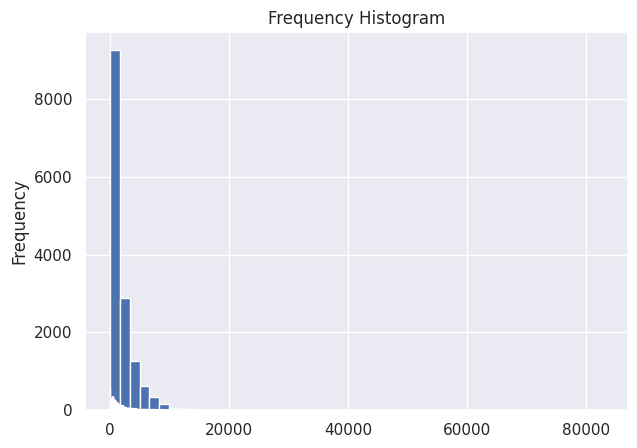

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = client_df["forecast_cons_12m"]
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

client_df["forecast_cons_12m"].hist(bins=2000)

In [19]:
#Another way to detect outliers are to use box plots and scatter plots.
#for the numeric data
import warnings 
warnings.filterwarnings("ignore")
def box_plots(df,listt,length,size):
  fig, ax = plt.subplots(length, 1)
  count=0
  # Setting height and width of subplots
  fig.set_figheight(size[0])
  fig.set_figwidth(size[1])
  plt.rcParams["figure.autolayout"] = True
  # Adding spacing between boxes
  fig.tight_layout(h_pad=True, w_pad=True)
  for list_item in listt:
    sns.boxplot(df[list_item], ax=ax[count],showmeans=True, meanline=True);
    count+=1
  plt.show()

In [20]:
listty=client_df.select_dtypes(include=np.number).columns.tolist()

In [21]:
len(listty)

18

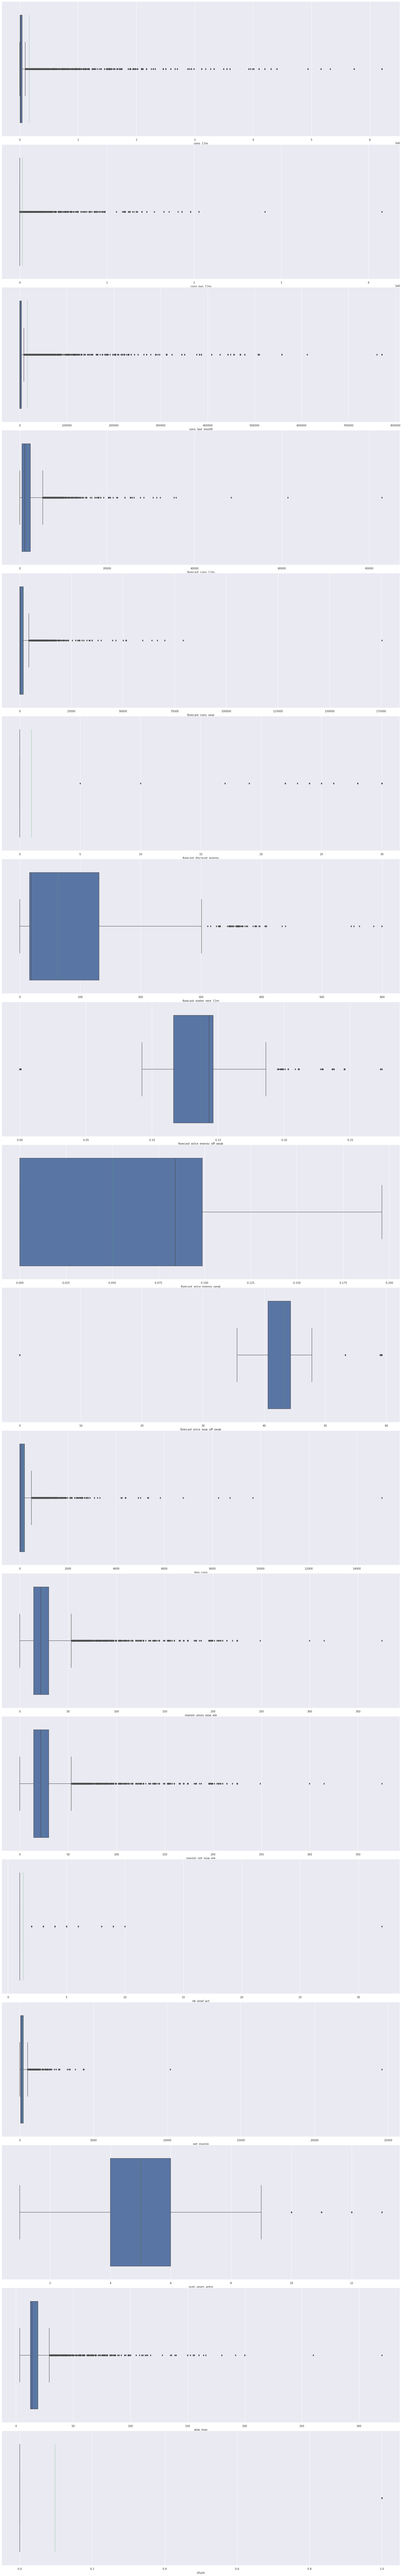

In [22]:
box_plots(client_df,listty,len(listty),[150,24])

The above box plot shows that most of the numeric fields have a really skewed distribution and there are many values of these features that are considered outliers far from where most of the values lay.

In [23]:
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

In [24]:
price_df.price_peak_var.unique()

array([0.      , 0.103395, 0.102234, ..., 0.097724, 0.094609, 0.090899])

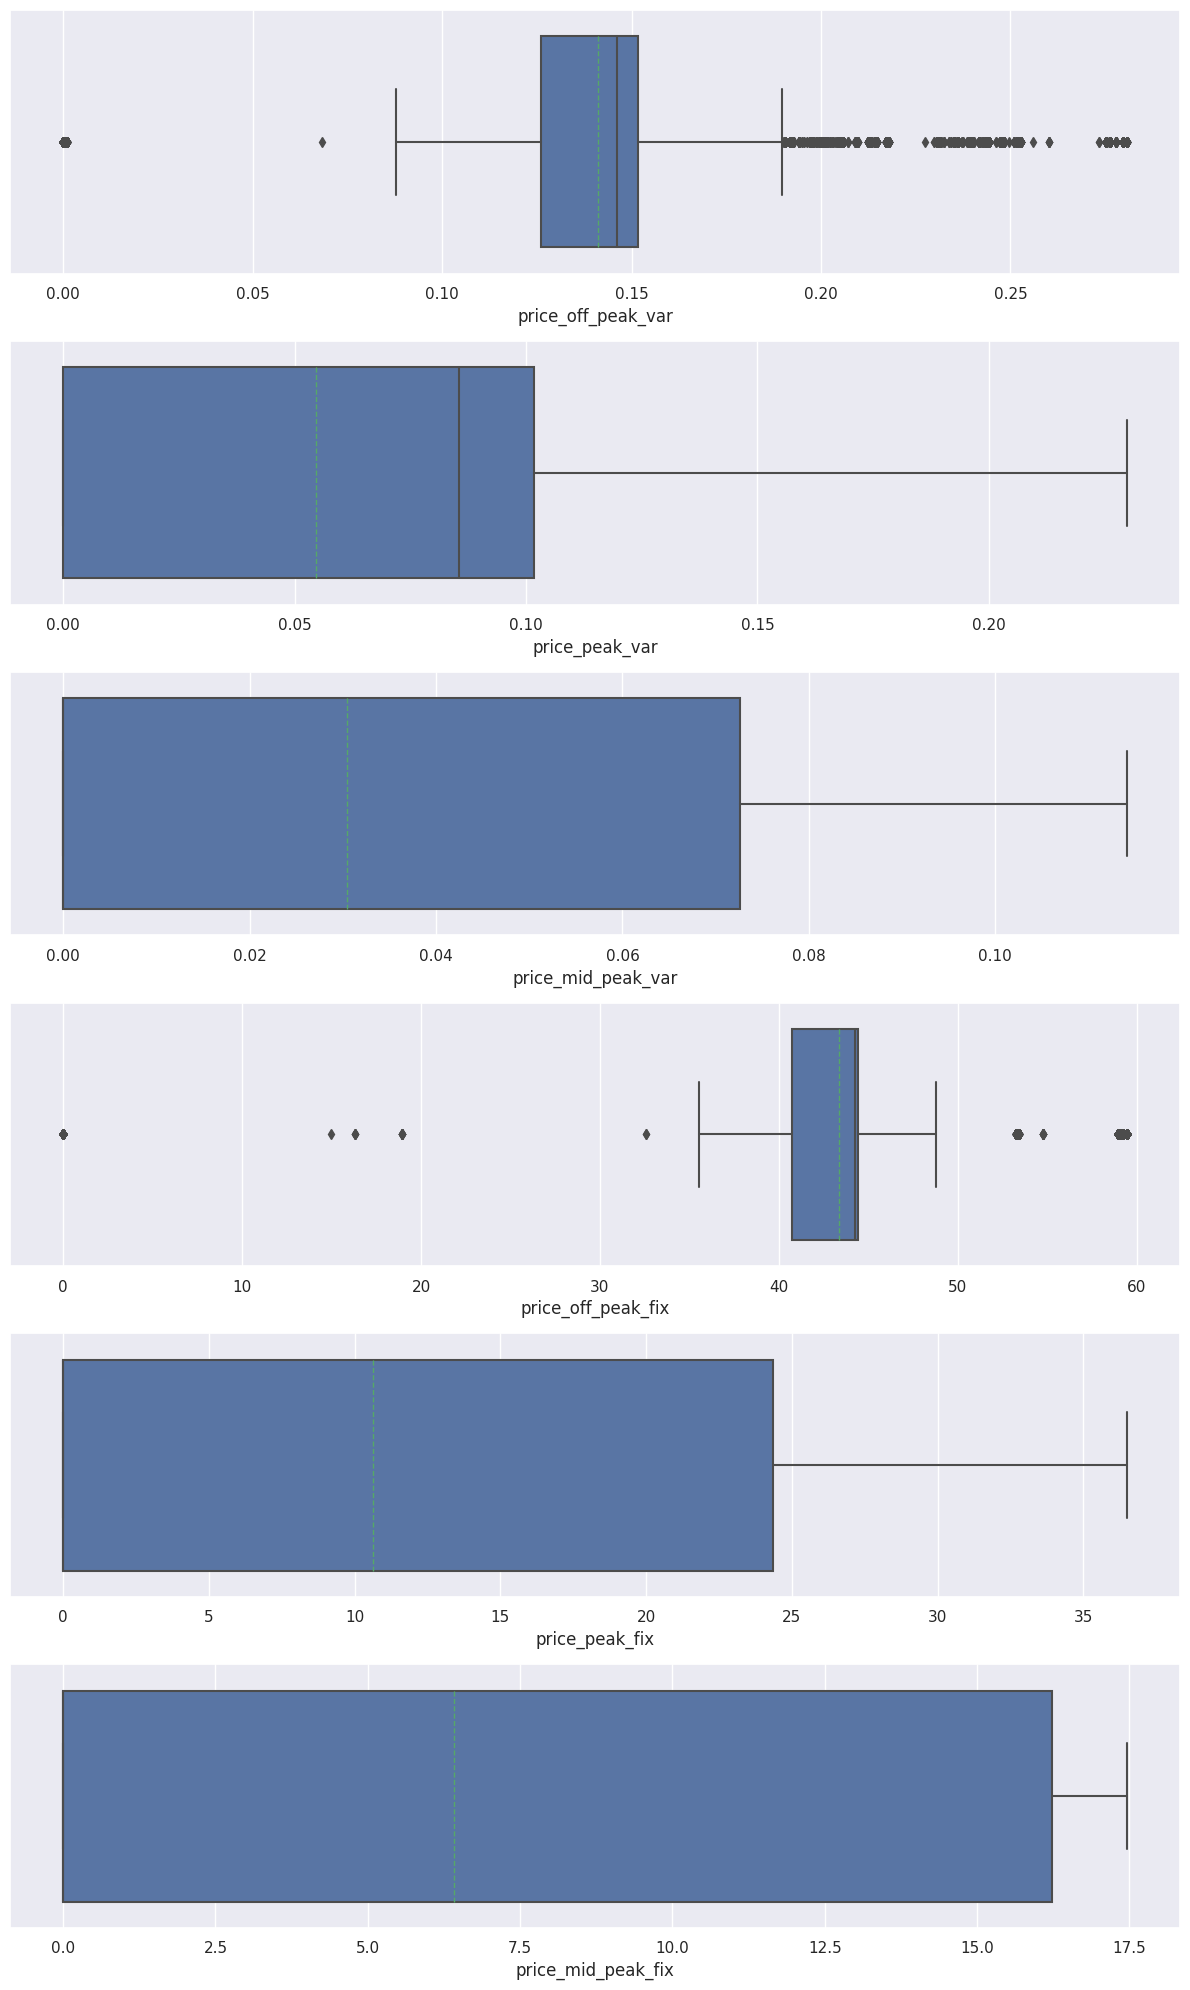

In [25]:
list_price=price_df.select_dtypes(include=np.number).columns.tolist()
box_plots(price_df,list_price, len(list_price), [20,12])

the numeric features of price_df are mostly of a skewed distribution. So, when merging the price and client dataframe together based on the client id, we will use the median for the peak values instead of the mean. 

In [26]:
price_df1=price_df.drop('price_date', axis=1)
price_centre_mean=price_df1.groupby(['id']).mean().reset_index()
price_centre_median=price_df1.groupby(['id']).median().reset_index()

In [27]:
price_centre_mean.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [28]:
merged_dfs_onmean=client_df.join(price_centre_mean.set_index('id'), on='id')
merged_dfs_onmedian=client_df.join(price_centre_median.set_index('id'), on='id')

In [29]:
merged_dfs_onmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [30]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

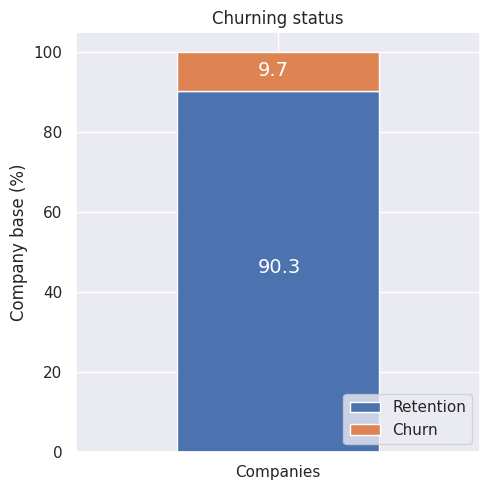

In [31]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

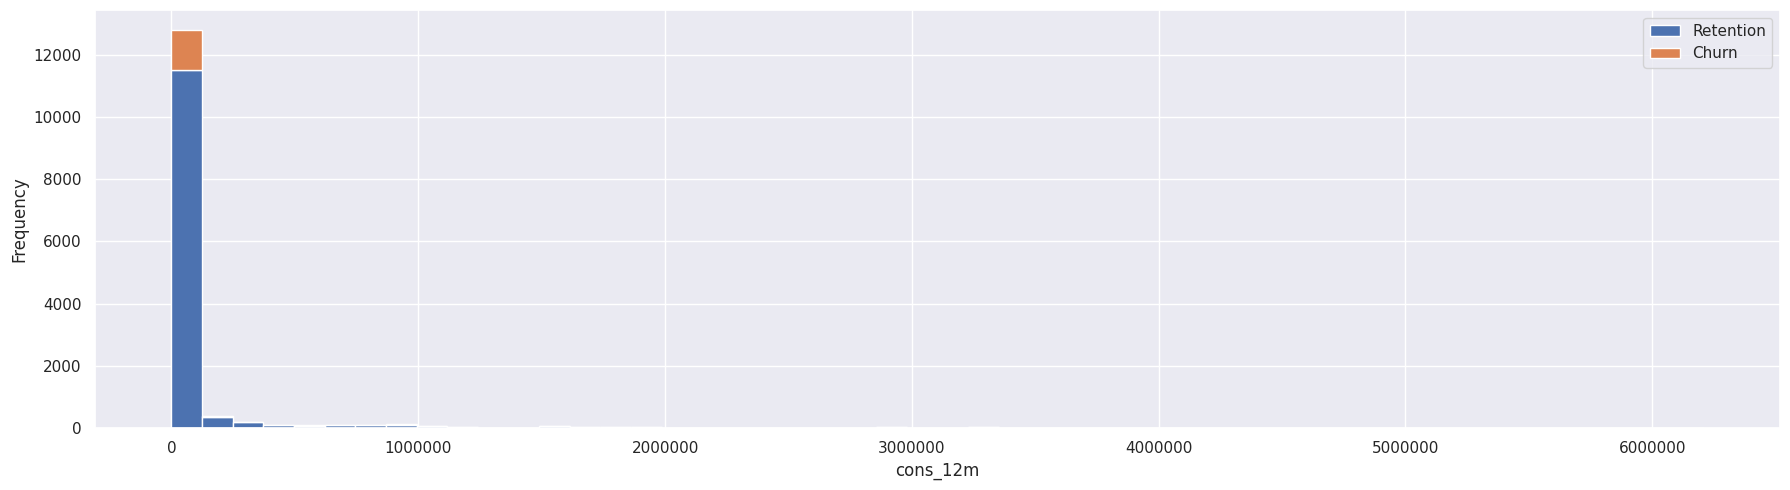

In [32]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

### **Correlation**

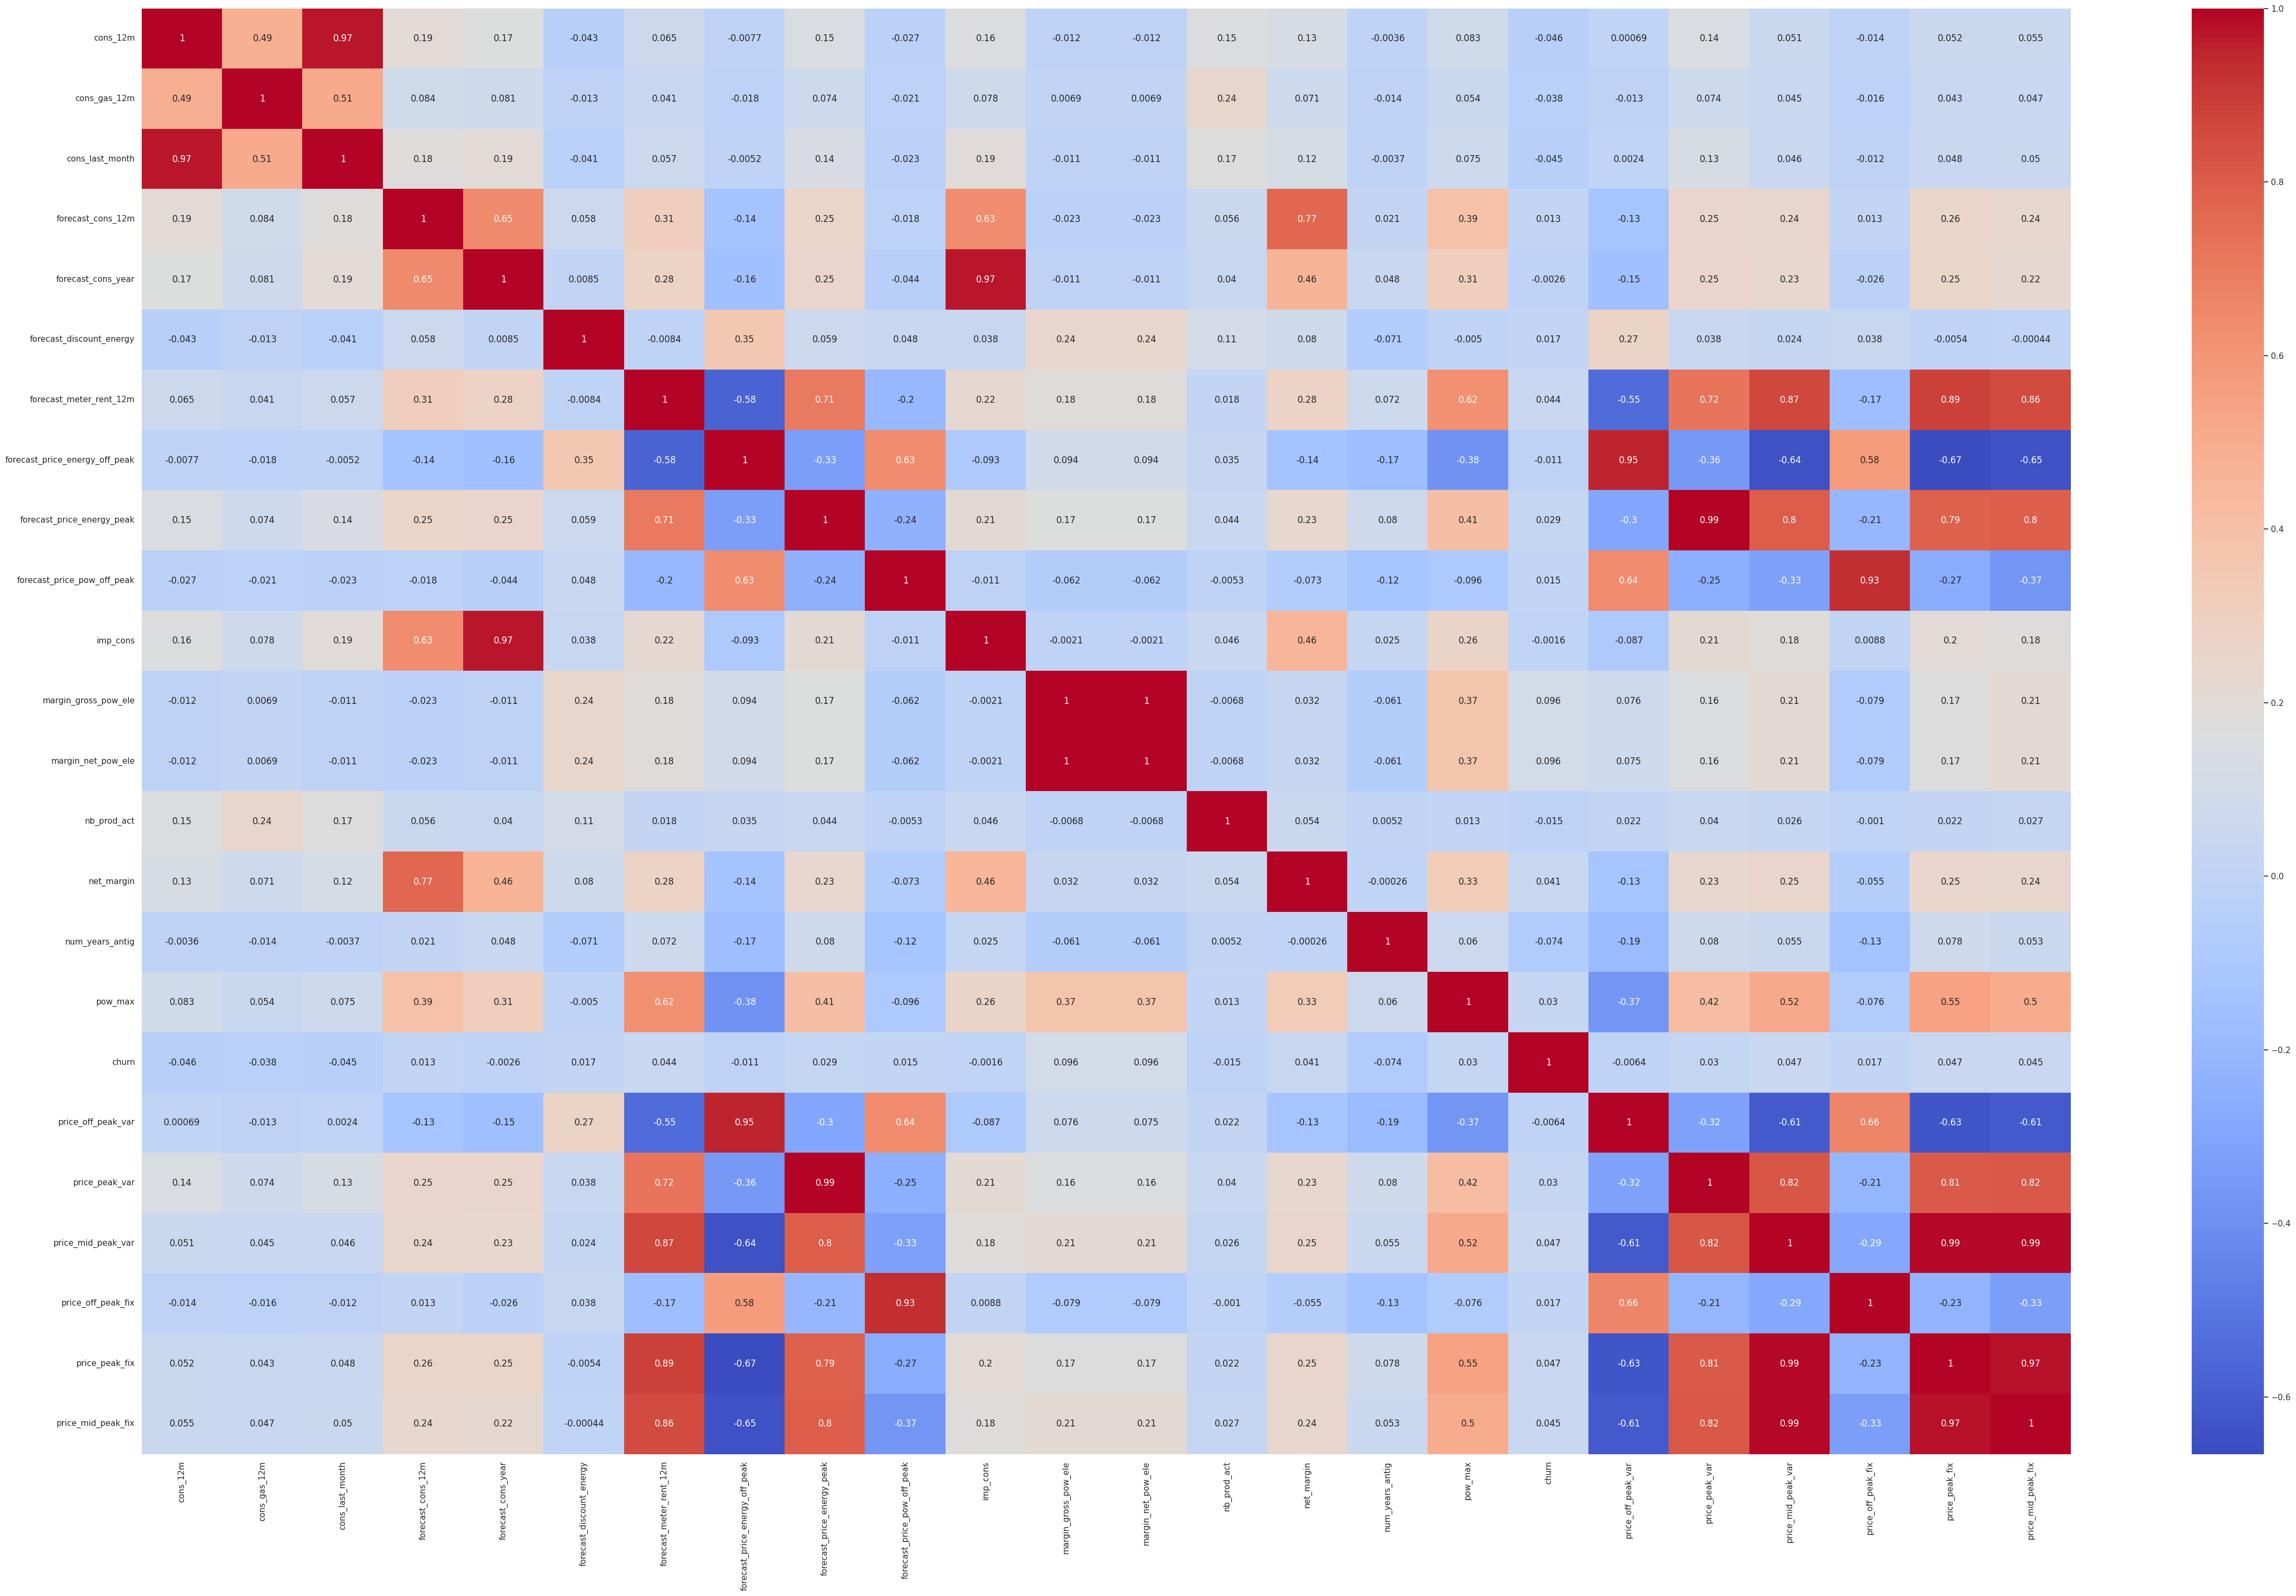

In [33]:
sns.set(rc = {'figure.figsize':(48,30)})
sns.heatmap(merged_dfs_onmean.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [34]:
merged_dfs_onmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

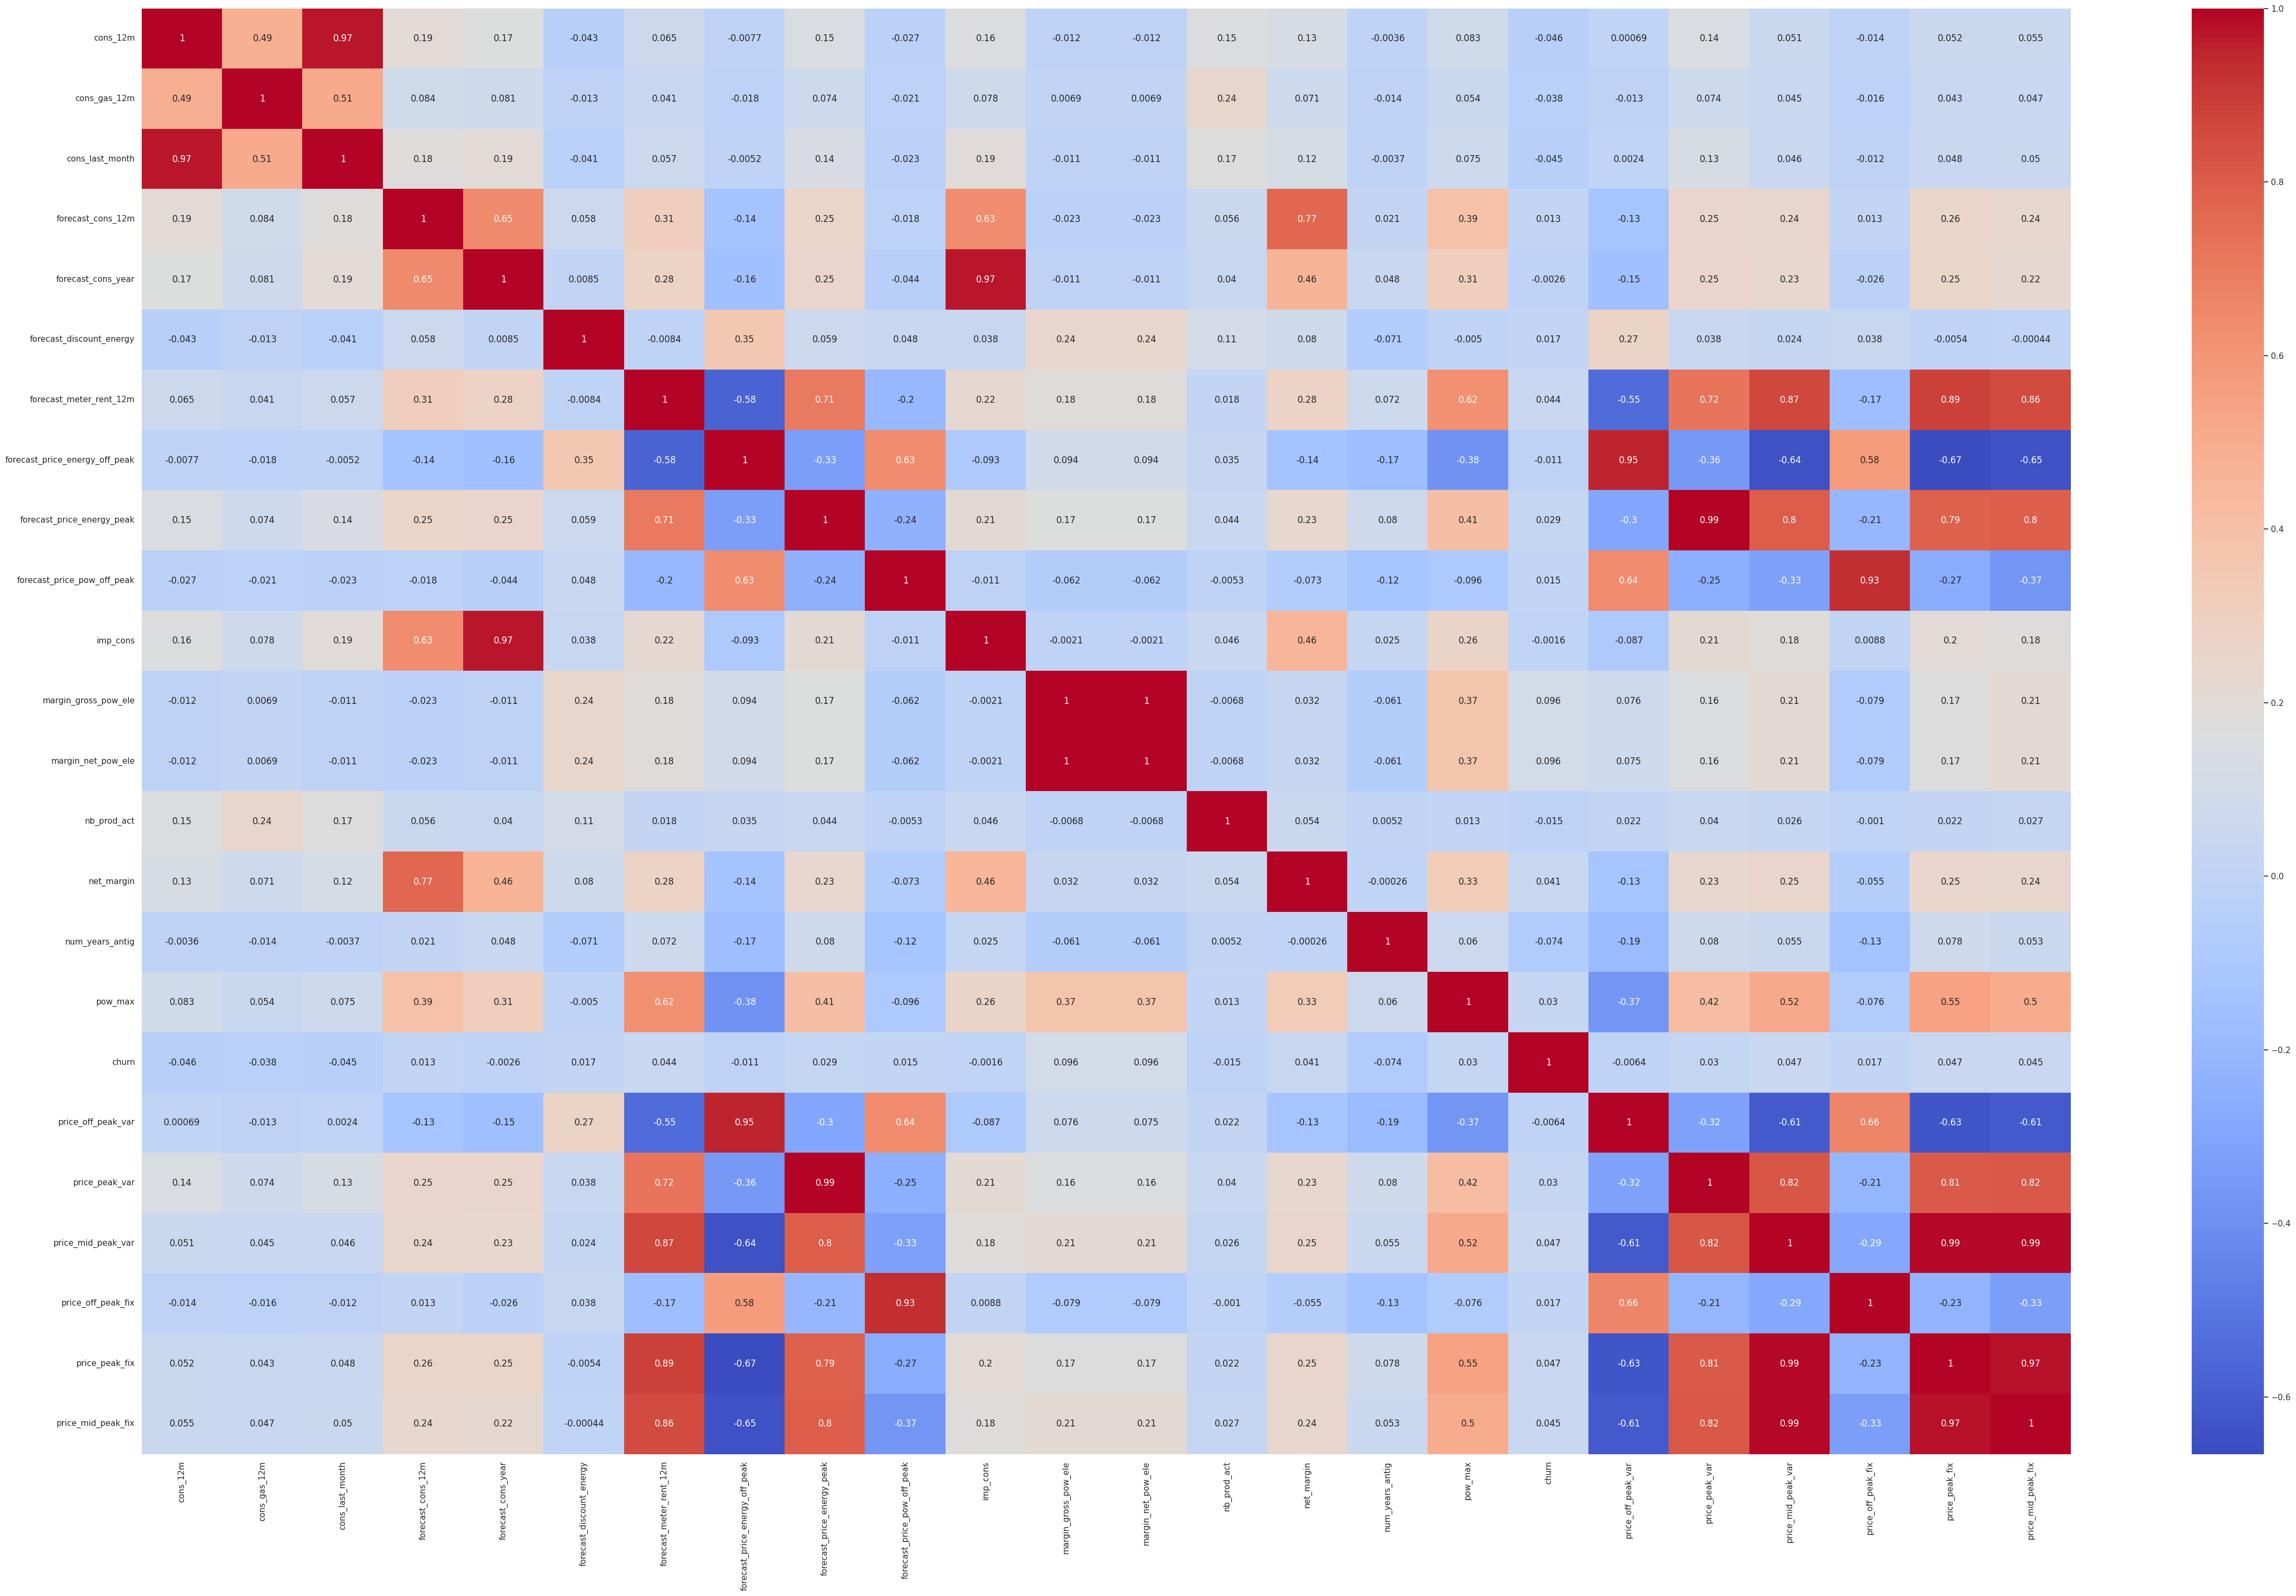

In [35]:
sns.set(rc = {'figure.figsize':(48,30)})
sns.heatmap(merged_dfs_onmean.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [36]:
import pandas as pd

def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        df = df[(df[col] >= mean+((-1)*n_std*sd))]
        
    return df


In [37]:
list_of_numerics=merged_dfs_onmean.select_dtypes(include=np.number).columns.tolist()

In [38]:
remove_outliers(merged_dfs_onmean,list_of_numerics,3)

Working on column: cons_12m
Working on column: cons_gas_12m
Working on column: cons_last_month
Working on column: forecast_cons_12m
Working on column: forecast_cons_year
Working on column: forecast_discount_energy
Working on column: forecast_meter_rent_12m
Working on column: forecast_price_energy_off_peak
Working on column: forecast_price_energy_peak
Working on column: forecast_price_pow_off_peak
Working on column: imp_cons
Working on column: margin_gross_pow_ele
Working on column: margin_net_pow_ele
Working on column: nb_prod_act
Working on column: net_margin
Working on column: num_years_antig
Working on column: pow_max
Working on column: churn
Working on column: price_off_peak_var
Working on column: price_peak_var
Working on column: price_mid_peak_var
Working on column: price_off_peak_fix
Working on column: price_peak_fix
Working on column: price_mid_peak_fix


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0,0.122816,0.102501,0.073536,40.674580,24.404747,16.269833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,1582ef35fbfa265e60bb3399bdebac87,MISSING,9441,0,480,2009-10-08,2016-10-08,2015-05-24,2015-10-09,983.97,...,6,ldkssxwpmemidmecebumciepifcamkci,15.001,0,0.123735,0.103538,0.073349,40.648679,24.411427,16.292803
14599,46362cb1ad2fcdad347a6fa1bc1e5d4b,foosdfpfkusacimwkcsosbicdxkicaua,18163,3036,0,2010-01-26,2017-01-26,2015-11-17,2016-01-27,2663.82,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.146555,0.000000,0.000000,44.266930,0.000000,0.000000
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,0.144124,0.000000,0.000000,44.370635,0.000000,0.000000
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000


In [39]:
merged_dfs_onmean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         